In [16]:
categories=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [17]:
import os
datadir=r"C:\Users\shail\Untitled Folder 1\imgs\train"

if os.path.exists(datadir):
    # Your code to work with the file or directory
    print('worked')
else:
    print(f'The path {datadir} does not exist.')

worked


In [18]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

flat_data_arr=[] #input array
target_arr=[] #output array

for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i)) 
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : c0
loaded category:c0 successfully
loading... category : c1
loaded category:c1 successfully
loading... category : c2
loaded category:c2 successfully
loading... category : c3
loaded category:c3 successfully
loading... category : c4
loaded category:c4 successfully
loading... category : c5
loaded category:c5 successfully
loading... category : c6
loaded category:c6 successfully
loading... category : c7
loaded category:c7 successfully
loading... category : c8
loaded category:c8 successfully
loading... category : c9
loaded category:c9 successfully


In [19]:
print(df.shape)


(22424, 67501)


In [20]:
sample_size = 10000  # Adjust the sample size as needed
sample_df = df.sample(n=sample_size, random_state=42)
print(sample_df.shape)
x=sample_df.iloc[:,:-1] #input data 
y=sample_df.iloc[:,-1] #output data



(10000, 67501)


C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

[[-3.21959001e+01 -7.44630007e+01  1.09105695e+02 ...  7.64264165e-01
   1.30468358e-01 -1.71464063e+00]
 [-8.73913029e+01 -3.49521819e+01 -8.53459812e+01 ... -7.56103586e-01
  -2.82395482e+00  2.77327846e+00]
 [-7.05356895e+01  1.62211829e+01 -8.69529165e+01 ... -4.71922547e-01
  -2.43552563e+00  2.43292741e+00]
 ...
 [-9.69005912e+01  1.30010993e+01 -1.40583396e+02 ... -6.13786000e-01
   1.52642043e+00 -1.08613850e+00]
 [ 1.47272360e+01  1.15275447e+02 -1.53369419e+01 ...  7.63898730e-01
  -2.75307077e+00  9.45531405e-01]
 [-8.79504212e+01  7.67751369e+00  1.47638263e+02 ... -1.59558800e+00
   4.02230866e-01 -1.09442891e+00]]
16411    7
15291    6
20489    9
19774    8
8520     3
        ..
13938    5
16247    6
3997     1
7511     3
7627     3
Name: Target, Length: 8000, dtype: int32


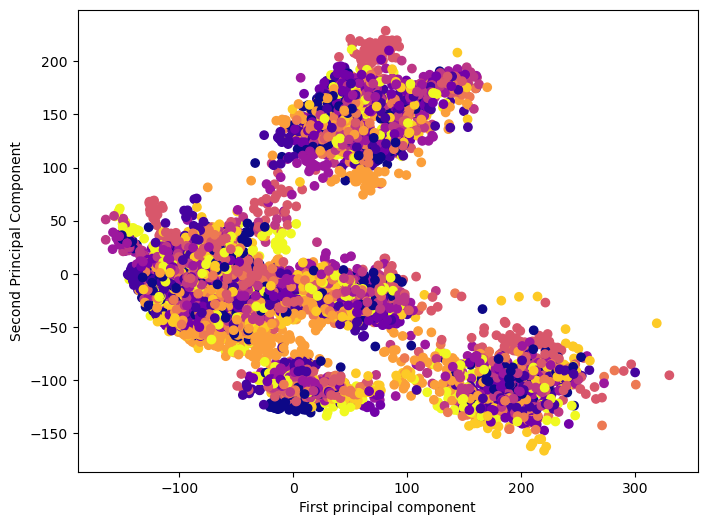

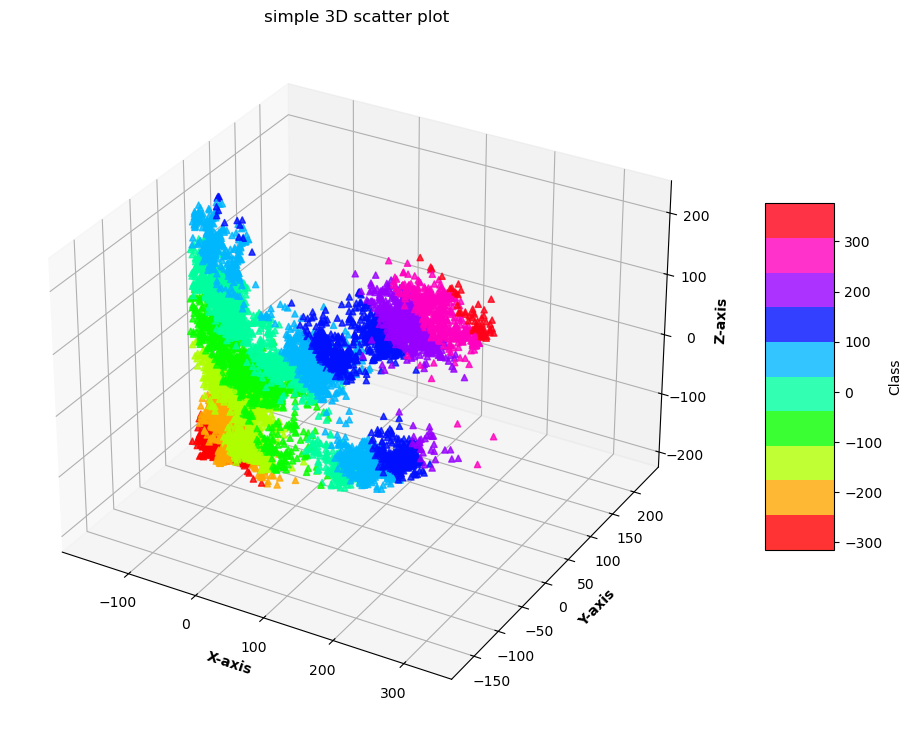

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42,stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=800)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv',10)
 
# Creating plot
sctt = ax.scatter3D(X_train[:,0],X_train[:,1] ,X_train[:,2],
                    alpha = 0.8,
                    c = (X_train[:,0]+X_train[:,1]+X_train[:,2]),
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5, label='Class')
 
# show plot
plt.show()

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=1,decision_function_shape='ovo')
import datetime

start=datetime.datetime.now()
svclassifier.fit(X_train, y_train)
end=datetime.datetime.now()
print("Model Training Time :",end-start)

y_pred = svclassifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model Training Time : 0:00:11.268573
Validation Accuracy: 0.99


C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [23]:
#Printing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

          c0       0.99      1.00      0.99       219
          c1       0.98      1.00      0.99       205
          c2       0.99      0.99      0.99       209
          c3       1.00      1.00      1.00       218
          c4       0.99      0.98      0.98       206
          c5       0.99      1.00      1.00       201
          c6       1.00      0.99      0.99       207
          c7       0.99      0.99      0.99       179
          c8       0.99      0.97      0.98       173
          c9       0.99      0.98      0.99       183

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [24]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
print(result)

       original  predicted
5478          2          2
19108         8          8
16095         6          6
134           0          0
14815         6          6
...         ...        ...
16764         7          7
20555         9          9
7571          3          3
8944          3          3
11418         4          4

[2000 rows x 2 columns]


[2]


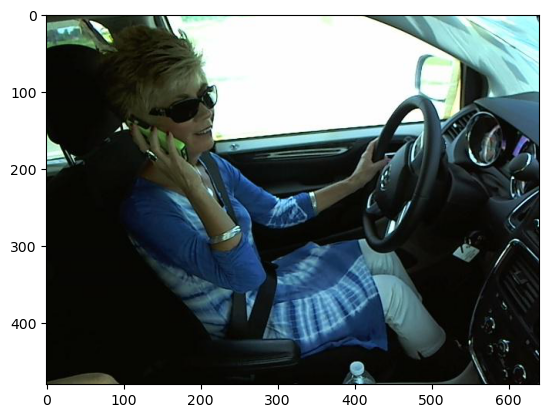

In [25]:
path=r"C:\Users\shail\Untitled Folder 1\imgs\test\c2\img_100108.jpg"
img_test=imread(path)
plt.imshow(img_test, cmap='gray') 
img_resize=resize(img_test,(150,150,3))
flattened_image = img_resize.flatten().reshape(1, -1)

# 2. Standardize the image
flattened_image_scaled = scaler.transform(flattened_image)

# 3. Apply PCA transformation
flattened_image_pca = pca.transform(flattened_image_scaled)

# 4. Predict with the model
prediction = svclassifier.predict(flattened_image_pca)
print(prediction)

In [26]:
###MODEL ANALYSIS

In [27]:
# install and import necessary libraries
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# define confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[219   0   0   0   0   0   0   0   0   0]
 [  0 205   0   0   0   0   0   0   0   0]
 [  0   1 206   0   1   0   0   1   0   0]
 [  0   0   0 217   1   0   0   0   0   0]
 [  1   2   0   1 202   0   0   0   0   0]
 [  0   0   0   0   0 201   0   0   0   0]
 [  0   1   1   0   0   0 205   0   0   0]
 [  0   0   1   0   0   0   0 178   0   0]
 [  1   0   0   0   1   1   1   0 168   1]
 [  1   0   0   0   0   1   0   0   2 179]]


C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [29]:
# define normalized confusion matrix
confusion_matrix_norm = metrics.confusion_matrix(y_test, y_pred, normalize="all")

print(confusion_matrix_norm)

[[0.1095 0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.1025 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0005 0.103  0.     0.0005 0.     0.     0.0005 0.     0.    ]
 [0.     0.     0.     0.1085 0.0005 0.     0.     0.     0.     0.    ]
 [0.0005 0.001  0.     0.0005 0.101  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.1005 0.     0.     0.     0.    ]
 [0.     0.0005 0.0005 0.     0.     0.     0.1025 0.     0.     0.    ]
 [0.     0.     0.0005 0.     0.     0.     0.     0.089  0.     0.    ]
 [0.0005 0.     0.     0.     0.0005 0.0005 0.0005 0.     0.084  0.0005]
 [0.0005 0.     0.     0.     0.     0.0005 0.     0.     0.001  0.0895]]


C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shail\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

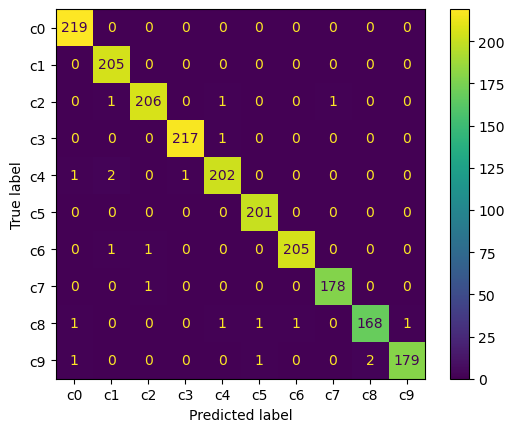

In [30]:
# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])

# display matrix
cm_display.plot()
plt.show()

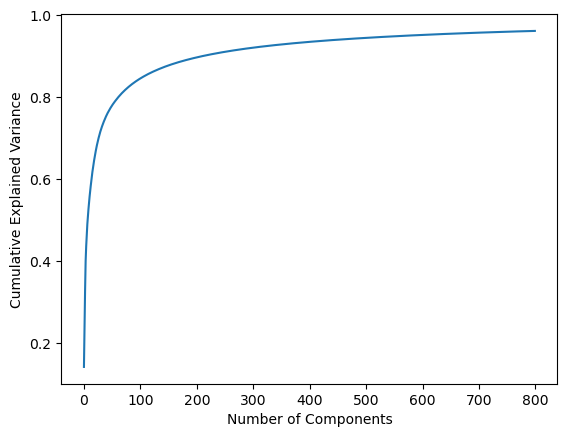

In [33]:
#Percentage of data/variance captured by features

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()